In [1]:
from astropy.table import Table, join
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
%matplotlib inline

In [2]:
# X/Ka - Gaia
ka2g = Table.read("../data/icrf3xka_icrf3sx_combined.fits")

num_sou = len(ka2g)

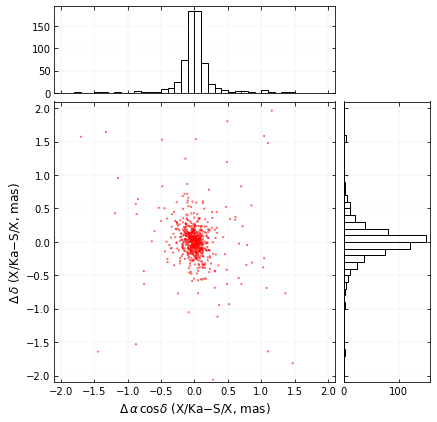

In [3]:
x, y = ka2g["dra_cor"], ka2g["ddec_cor"]

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.12, 0.65
bottom, height = 0.12, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(6., 6.))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y, s=2, lw=0.5, facecolors="None", edgecolors="r")
axScatter.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (X/Ka$-$S/X, mas)", fontsize=12)
axScatter.set_ylabel("$\Delta\,\delta$ (X/Ka$-$S/X, mas)", fontsize=12)

# now determine nice limits by hand:
binwidth = 0.1
xymax = 2
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins, fill=False)
axHisty.hist(y, bins=bins, orientation="horizontal", fill=False)

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axScatter.grid(lw=0.1)
axHistx.grid(lw=0.1)
axHisty.grid(lw=0.1)

# plt.savefig("../plots/k-sx-scatter.eps", hbox="tight")

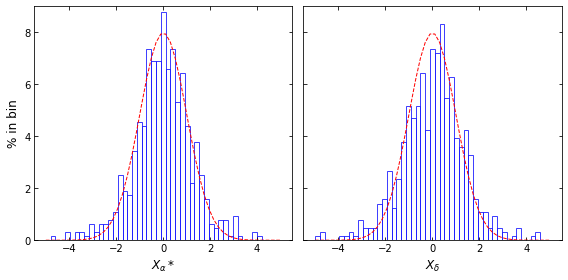

In [4]:
# Difference in RA and decl.
x, y = ka2g["nor_ra_cor"], ka2g["nor_dec_cor"]
bins_array = np.linspace(-5, 5, 50)
weights = np.ones(num_sou) * 100. / num_sou 

fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2, sharey=True)
ax0.hist(x, bins_array, weights=weights, facecolor='w', alpha=0.75, edgecolor="b")
ax1.hist(y, bins_array, weights=weights, facecolor="w", edgecolor="b", alpha=0.75)

# add a '(standard) Gaussian distribution' line
Gaussian_dist = stats.norm.pdf(bins_array, 0, 1) * 10. / 50
ax0.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)
ax1.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)

ax0.set_yticks(np.arange(0, 26, 2))
ax1.set_yticks(np.arange(0, 26, 2))

ax0.set_ylim([0, 9])
ax1.set_ylim([0, 9])

ax0.set_xlabel("$X_\\alpha*$", fontsize=12)
ax1.set_xlabel("$X_\\delta$", fontsize=12)

ax0.set_ylabel("% in bin", fontsize=12)
# ax1.set_ylabel("% in bin")

fig.tight_layout()
plt.show()

Text(0, 0.5, '% in bin')

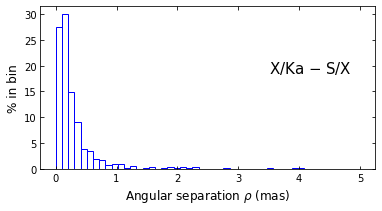

In [5]:
# Distribution of normalized separation
x = ka2g["ang_sep_cor"]
bins_array = np.linspace(0, 5, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, 
        facecolor="w", edgecolor="b")

ax.text(3.5, 18.5, "X/Ka $-$ S/X", fontsize=15)
# ax.set_xlim([0, 10])
ax.set_xlabel("Angular separation $\\rho$ (mas)", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
# ax.grid()

# plt.savefig("../plots/rho_icrf3sx_gaiaedr3.eps")

Text(0, 0.5, '% in bin')

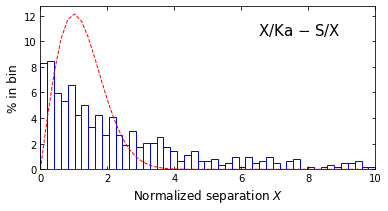

In [6]:
# Distribution of normalized separation
x = ka2g["nor_sep_cor"]

bins_array = np.linspace(0, 10, 50)
weights = np.ones(num_sou) * 100. / num_sou

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(x, bins_array, weights=weights, 
        facecolor="w", edgecolor="b")

# add a '(standard) Reyleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "r--", linewidth=1)

ax.text(6.5, 10.5, "X/Ka $-$ S/X", fontsize=15)

ax.set_xlim([0, 10])
ax.set_xlabel("Normalized separation $X$", fontsize=12)
ax.set_ylabel("% in bin", fontsize=12)
# ax.grid()

# plt.savefig("../plots/x_icrf3sx_gaiaedr3.eps")

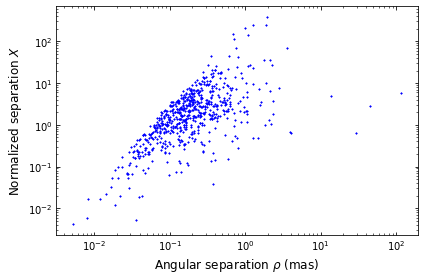

In [7]:
# Angular separation vs. normalized separation
fig, ax = plt.subplots()

ax.plot(ka2g["ang_sep_cor"], ka2g["nor_sep_cor"], "b*", ms=1.5, label="Used")

ax.set_ylabel("Normalized separation $X$", fontsize=12)
ax.set_xlabel("Angular separation $\\rho$ (mas)", fontsize=12)

ax.set_xscale("log")
ax.set_yscale("log")

fig.tight_layout()

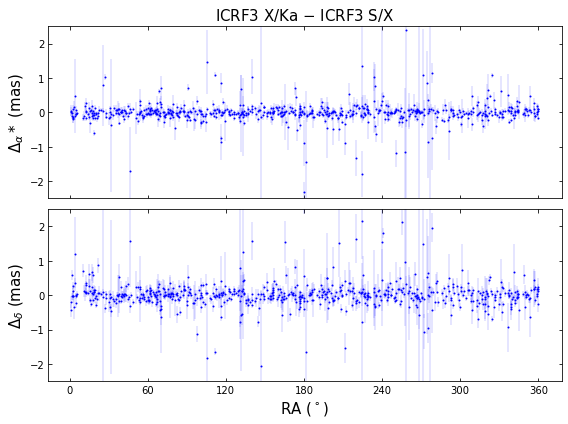

In [8]:
# Difference in RA and decl.
fig, (ax0, ax1) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True, sharey=True)

ax0.errorbar(ka2g['ra'], ka2g['dra_cor'], yerr=ka2g['dra_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)
ax1.errorbar(ka2g['ra'], ka2g['ddec_cor'], yerr=ka2g['ddec_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax0.set_xticks(np.arange(0, 361, 60))

ax0.set_ylim([-2.5, 2.5])

ax1.set_xlabel('RA ($^\circ$)', fontsize=15)
ax0.set_ylabel('$\Delta_\\alpha*$ (mas)', fontsize=15)
ax1.set_ylabel('$\Delta_\\delta$ (mas)', fontsize=15)

ax0.set_title("ICRF3 X/Ka $-$ ICRF3 S/X", fontsize=15)
fig.tight_layout()

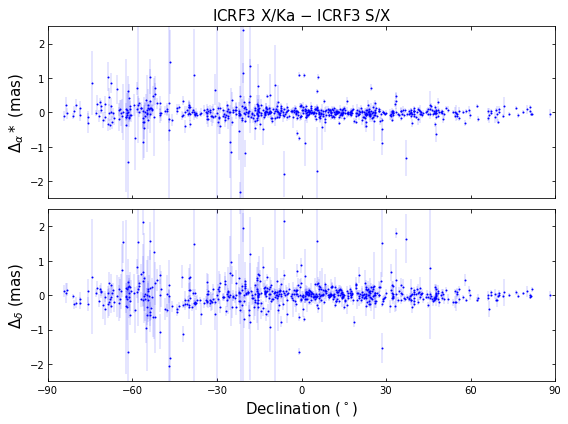

In [9]:
# Difference in RA and decl.
fig, (ax0, ax1) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True, sharey=True)

ax0.errorbar(ka2g['dec'], ka2g['dra_cor'], yerr=ka2g['dra_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)
ax1.errorbar(ka2g['dec'], ka2g['ddec_cor'], yerr=ka2g['ddec_err'],
             fmt='.', color='b', elinewidth=0.2, ms=2)

ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_xlim([-90, 90])
ax0.set_ylim([-2.5, 2.5])

ax1.set_xlabel('Declination ($^\circ$)', fontsize=15)
ax0.set_ylabel('$\Delta_\\alpha*$ (mas)', fontsize=15)
ax1.set_ylabel('$\Delta_\\delta$ (mas)', fontsize=15)

ax0.set_title("ICRF3 X/Ka $-$ ICRF3 S/X", fontsize=15)
fig.tight_layout()